In [1]:
import pandas as pd
dataset2 = pd.read_csv('/kaggle/input/shakko-articles-dataset/shakko2.csv', index_col=0)
dataset2.head(5)

,title,link,comments,article_text
0,Выставка невиданного авангарда открылась в Москве,https://shakko.ru/1748500.html,61.0,В московском Музее русского импрессионизма от...
1,Вандал пририсовал глаза фигурам на картине уче...,https://shakko.ru/1739606.html,52.0,В Екатеринбурге вандал напал на картину учени...
2,"Деревянные «идолы» авангардистов, комиксная ле...",https://shakko.ru/1730700.html,9.0,"Выставка, посвященная переосмыслению русского..."
3,"Десять полностью однотонных картин, которые ст...",https://shakko.ru/1726266.html,145.0,"Какие картины, состоящие только из 1 цвета, в..."
4,Легкая возможность почувствовать себя меценатом,https://shakko.ru/1688703.html,31.0,"Значит, вот такая история.Жил-был такой худож..."


In [2]:
dataset2.describe([0.01,0.25,0.5, 0.75,0.99]).T

,count,mean,std,min,1%,25%,50%,75%,99%,max
comments,670.0,75.853731,80.963053,0.0,0.0,21.0,54.5,99.0,366.55,682.0


<AxesSubplot:>

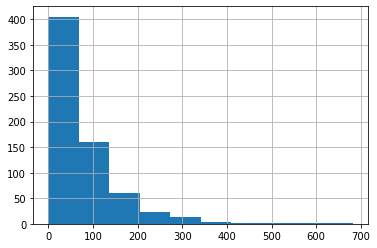

In [3]:
dataset2["comments"].hist()

In [4]:
# Посмотрим лидеров обсуждения
dataset2[dataset2["comments"] > 400]

,title,link,comments,article_text
39,Художницы-феминистки из Индии: почему без этог...,https://shakko.ru/1565325.html,441.0,Одна из древнейших культур на этой планете --...
122,"Так объясните наконец, почему «Чёрный квадрат»...",https://shakko.ru/1677504.html,414.0,Уважаемый читатель спрашивает:почему «Чёрный ...
234,Сказки как способ программирования наших детей,https://shakko.ru/1357790.html,682.0,Коллективными усилиями проникаем в мировой фо...
254,Советское детство. В современном искусстве. А ...,https://shakko.ru/1398245.html,550.0,В одной нью-йоркской арт-галерее 2 мая открыл...
292,Почему иконы должны храниться в музеях,https://shakko.ru/1256209.html,595.0,Уважаемый читатель спрашивает:Вы как-то упомя...
332,Автопортрет со Страшным судом и мёртвым царем-...,https://shakko.ru/1289620.html,513.0,Продолжаю собирать изображения Николая II c c...


И почему я не удивляен увидеть тут "Черный квадрат"? :) Но всё же к делу... 

In [5]:
#dataset2 = dataset2[dataset2["comments"] < 400]

#  Natural Language processing

In [6]:
! pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 KB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 41.7 MB/s eta 0:00:00


In [7]:
import numpy as nm
%matplotlib inline
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.metrics import *
import warnings
import string
import time
import nltk
warnings.filterwarnings("ignore")

In [8]:
# выберем кошку для тренировки
article_text = dataset2.loc[292, "article_text"]
print(len(article_text))
print(article_text[:1000])

18380
 Уважаемый читатель спрашивает:Вы как-то упомянули, что старинные иконы должны храниться в музеях, а в церкви их отдавать нельзя. Почему? Вроде же вы верующий человек, объясните, ведь иконы — это же священные предметы, их надо возвращать!Hет, старинные иконы, произведения искусства, должны храниться в музеях. Выдавать их из музеев в действующие церкви — нельзя. Рассказываю, почему, на пальцах.Дело даже в простой практичности, безотносительно религии. Скорее, дело в «медицине».Эпиграф от lisitsinaoОсобо рьяные бабули, которые периодически приходят в наш музей на экскурсии,неоднократно задавали нам вопрос:«А не хотите ли вы все иконы в храмы вернуть?»Мы придумали отвечать: «Все иконы, которые вы видите в музее — это иконы НА ПЕНСИИ»Действует безотказно.***Итак, начнем с реальных, практических вещей, которые можно «потрогать», безотносительно всяких идеологических споров. Оказывается, об этих элементарных основах многие не подозревают.Отдавать нельзя, потому что:1) Икона — это не ка

In [9]:
# токенизация
word_tokenaizer = nltk.WordPunctTokenizer()

# регистр
article_text = article_text.lower()

article_text_lst = word_tokenaizer.tokenize(article_text)

article_text_lst[:10]

['уважаемый',
 'читатель',
 'спрашивает',
 ':',
 'вы',
 'как',
 '-',
 'то',
 'упомянули',
 ',']

In [10]:
#string.punctuation

# загружаем список стоп слов
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('russian')
print(len(stop_words))
stop_words[:10]

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
151


['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со']

In [11]:
import re

# пунктуация. 
# В тексте присутсвуют сложные конструкции вроде ':«' '?»' '**' итд.
# удалим всё кроме русских слов.
article_word_lst = [word for word in article_text_lst if re.match(r'[а-яА-ЯёЁ]+', word)]
article_word_lst[:10]

['уважаемый',
 'читатель',
 'спрашивает',
 'вы',
 'как',
 'то',
 'упомянули',
 'что',
 'старинные',
 'иконы']

In [12]:
article_word_lst = [word for word in article_word_lst if word not in stop_words]
article_word_lst[:10]

['уважаемый',
 'читатель',
 'спрашивает',
 'упомянули',
 'старинные',
 'иконы',
 'должны',
 'храниться',
 'музеях',
 'церкви']

In [13]:
# леммезация
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

# что делает парсер
print(morph.parse(article_word_lst[3]))

norm_word_lst = [morph.parse(word)[0].normal_form for word in article_word_lst]
norm_word_lst[:20]

[Parse(word='упомянули', tag=OpencorporaTag('VERB,perf,tran plur,past,indc'), normal_form='упомянуть', score=1.0, methods_stack=((DictionaryAnalyzer(), 'упомянули', 314, 4),))]


['уважаемый',
 'читатель',
 'спрашивать',
 'упомянуть',
 'старинный',
 'икона',
 'должный',
 'храниться',
 'музей',
 'церковь',
 'отдавать',
 'почему',
 'вроде',
 'веровать',
 'человек',
 'объяснить',
 'икона',
 'это',
 'священный',
 'предмет']

In [14]:
# соберем автомат

def text_processing(text):
    
    # нижний регистр
    text = text.lower()
    
    # токенизация
    word_list = word_tokenaizer.tokenize(text)
    
    #убираем, всё кроме букв и цифр.
    word_list = [word for word in word_list if re.match(r'[а-яА-ЯёЁ]+', word)]
    
    #убираем стоп слова
    word_list = [word for word in word_list if word not in stop_words]
    
    # леммезация
    out_text = ''
    for word in word_list:
        out_text += morph.parse(word)[0].normal_form + " " 
    
    return out_text

print(text_processing(dataset2.loc[291, "article_text"]))

килограмм золото драгоценный камень икона принадлежать царь иван ныне музей кремль посмотреть роскошь великолепный бохатай царский работа икона оклад похвала богоматерь мастерская московский кремль последний четверть век верхний поле сапфировый камея богоматерь младенец трон константинополь век интересно частность сочетаться православный искусство самый разный век гигантский сапфир который вырезать камея фигура богоматерь сделать константинополь великий бог знать попасть русь кто принадлежать москва последний царь написать икона одеть драгоценный оклад наслать камень который мочь соперничать размер византийский сапфир украсить другой край икона контурный изображение камень выполнить русский камнерез век внизу пророк илияпо угол евангелистын боковой сторона иоанн предтеча преподобный параскева тезоименный святой царь иоанн алексеевич царица прасковья это сфотографировать 


In [15]:
dataset2.dropna(axis=0, inplace=True)
dataset2.isna().sum()

title           0
link            0
comments        0
article_text    0
dtype: int64

In [16]:
dataset2["lemmed_text"] = dataset2["article_text"].apply(lambda a: text_processing(a))


In [17]:
dataset2.head()

,title,link,comments,article_text,lemmed_text
0,Выставка невиданного авангарда открылась в Москве,https://shakko.ru/1748500.html,61.0,В московском Музее русского импрессионизма от...,московский музей русский импрессионизм открыть...
1,Вандал пририсовал глаза фигурам на картине уче...,https://shakko.ru/1739606.html,52.0,В Екатеринбурге вандал напал на картину учени...,екатеринбург вандал напасть картина ученица ма...
2,"Деревянные «идолы» авангардистов, комиксная ле...",https://shakko.ru/1730700.html,9.0,"Выставка, посвященная переосмыслению русского...",выставка посвятить переосмысление русский аван...
3,"Десять полностью однотонных картин, которые ст...",https://shakko.ru/1726266.html,145.0,"Какие картины, состоящие только из 1 цвета, в...",какой картина состоять цвет войти история живо...
4,Легкая возможность почувствовать себя меценатом,https://shakko.ru/1688703.html,31.0,"Значит, вот такая история.Жил-был такой худож...",значит такой история жить художник алексей мор...


In [18]:
dataset2.to_csv("/kaggle/working/dataset2_dump.csv")

# Построение модели

In [19]:
dataset2['lemmed_text']

0      московский музей русский импрессионизм открыть...
1      екатеринбург вандал напасть картина ученица ма...
2      выставка посвятить переосмысление русский аван...
3      какой картина состоять цвет войти история живо...
4      значит такой история жить художник алексей мор...
                             ...                        
753    ух уважаемый читатель проанализировать позырил...
755    самый красивый образ смерть мировой искусство ...
757    позавчера читать поэма сказка горький обрамлен...
758    вчерашний обсуждение фотореконструкция пародия...
759    популярность произведение искусство теоретичес...
Name: lemmed_text, Length: 670, dtype: object

In [20]:
from sklearn.model_selection import train_test_split

texts =dataset2['lemmed_text']
y = dataset2['comments']
train_texts, test_texts, train_y, test_y = train_test_split(texts, y, test_size=0.15, random_state=13) #, stratify=y)

print(train_texts.shape, test_texts.shape)

(569,) (101,)


In [21]:
#Вычисляем tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(max_features = 2000, norm=None)
vect.fit(train_texts)

vect.get_feature_names()[:10]

['абсолютно',
 'авангард',
 'август',
 'автоматически',
 'автопортрет',
 'автор',
 'авторский',
 'ад',
 'адрес',
 'академический']

In [22]:
train_texts_vect = vect.fit_transform(train_texts)
test_texts_vect = vect.transform(test_texts)
#train_texts_vect.todense()[3]

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

model = linear_model.Lasso(alpha=0.1)

parameters = {'alpha': [10, 30, 50, 70, 100]}

clf = GridSearchCV(model, parameters, cv=3, scoring='neg_root_mean_squared_error')

clf.fit(train_texts_vect, train_y)

print(clf.best_params_, clf.best_score_)


{'alpha': 30} -72.0384632432997


In [24]:

pred_train = clf.predict(train_texts_vect)
pred_test = clf.predict(test_texts_vect)


print("Train RMSE:", mean_squared_error(pred_train, train_y, squared=False), "Train MAE:", mean_absolute_error(pred_train, train_y))
print("Test RMSE:", mean_squared_error(pred_test, test_y, squared=False), "Test MAE:", mean_absolute_error(pred_test, test_y))

Train RMSE: 66.22618328817114 Train MAE: 47.143606245687586
Test RMSE: 89.37536072540998 Test MAE: 57.45889798933291


In [25]:
word_score = pd.DataFrame(vect.get_feature_names(), columns=['word'])
word_score['coef'] = clf.best_estimator_.coef_
word_score.sort_values("coef", ascending=False).head(10)

,word,coef
1543,сказка,3.703551
1982,это,2.179442
1117,пикассо,1.867012
559,индийский,1.366393
612,картина,1.100888
1960,шедевр,0.531192
373,джефферсон,0.520297
580,искусство,0.325861
1472,рочестер,0.316249
1424,ребёнок,0.308255


Итак, прогноза алгоритма получилась невпечатляющей. Видимо 600 записей - это маловато.

Алгоритм выделил слово "сказка", "индийский". Они, кстати, были в топе коментируемых.
Люди также любят говорить о детях, обсуждать шедевры. Пикассо, как один из самых противоречивых художнмиков, тоже нащёл себя в топе.
Неожиданно тудаже попал герой "Джей Эйр" и Джеферсон, возможно Томас, но непонятно в каком контексте.

Интересно также что слова 'картина' и 'искусство' ропшли фильтр tf-id.

Updated: Если выбросить стать лидеров с более 400 коментариев, то в топе появится "удовольствие", а также герои романа Жуля Верна.

In [26]:
word_score.sort_values("coef").head(5)

,word,coef
257,выставка,-0.389129
825,монета,-0.213884
38,апокалипсис,-0.131766
210,воронцов,-0.087327
25,аметист,-0.021277


Обзоры выставок видимо вызывают слабые дискуссии.

# Использование max_df и min_df

Выделено в отдельный раздел, потому что результаты с и без одинаково заслуживают внимания. А ещё потому, что я про них чуть не забыл :)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

#добавим ограничения
vect = TfidfVectorizer(max_features = 2000, max_df=0.9, min_df=0.1, norm=None)

#далее как в прошлый раз
train_texts_vect = vect.fit_transform(train_texts)
test_texts_vect = vect.transform(test_texts)

model = linear_model.Lasso()
parameters = {'alpha': [1, 5, 10, 30, 50, 100]}
clf = GridSearchCV(model, parameters, cv=3, scoring='neg_root_mean_squared_error')
clf.fit(train_texts_vect, train_y)
print(clf.best_params_, clf.best_score_)

pred_train = clf.predict(train_texts_vect)
pred_test = clf.predict(test_texts_vect)

print("Train RMSE:", mean_squared_error(pred_train, train_y, squared=False), "Train MAE:", mean_absolute_error(pred_train, train_y))
print("Test RMSE:", mean_squared_error(pred_test, test_y, squared=False), "Test MAE:", mean_absolute_error(pred_test, test_y))

word_score = pd.DataFrame(vect.get_feature_names(), columns=['word'])
word_score['coef'] = clf.best_estimator_.coef_
word_score.sort_values("coef", ascending=False).head(20)


{'alpha': 10} -72.72313220612818
Train RMSE: 63.18554169836227 Train MAE: 43.661072974928324
Test RMSE: 90.34945397923785 Test MAE: 57.96129496697864


,word,coef
300,ребёнок,2.919431
328,сильный,2.800632
97,знать,2.030362
263,почему,1.778404
203,нормальный,1.719580
252,понимать,1.628176
127,картина,1.408363
345,советский,1.262395
346,современный,1.245226
134,комментарий,1.170039


После исключения 10 процентов наиболее и наимение употребимых слов в топе появилось много ударных эпитетов: сильный, нормальный, советский, современный. 
На сильные аргументы нашлось немало контраргуметов в комментариях.

Слово "картина" кстати осталась в топе. Видимо живопись более обсуждаема, чем, например, скульптура.

# Тематическое моделирование LSI (LSA)

In [28]:
sw = ['картина', 'музей', 'художник', 'пушкин', 'который', 'это', 'такой', 'н', 'э', 'вяземский', 'воронцов']



tokenized_text = []


for text in texts:
    text = [w for w in text.split() if w not in sw]
    tokenized_text.append(text)
    
tokenized_text[0]

['московский',
 'русский',
 'импрессионизм',
 'открыться',
 'выставка',
 'авангард',
 'телега',
 'век',
 'май',
 'представить',
 'феноменальный',
 'русский',
 'авангард',
 'потерянный',
 'вятский',
 'губерния',
 'около',
 'сто',
 'год',
 'назад',
 'телега',
 'передвижной',
 'выставка',
 'застрять',
 'погода',
 'срастись',
 'вернуть',
 'столица',
 'небольшой',
 'рассказ',
 'выставка',
 'почитать',
 'возвращение',
 'этот',
 'научный',
 'оборот',
 'недавний',
 'заслуга',
 'искусствовед',
 'мой',
 'старое',
 'интервью',
 'андрей',
 'сарабьянов',
 'рассказывать',
 'находка',
 'оно',
 'московский',
 'выставка',
 'взять',
 'прямо',
 'искусствоведческий',
 'детектив',
 'несколько',
 'фото',
 'вернисаж']

In [29]:
from gensim.models import *
from gensim import corpora
from gensim import similarities


In [30]:
#from gensim.models.doc2vec import Doc2Vec

dictionary = corpora.Dictionary(tokenized_text)
print(dictionary)
dictionary.filter_extremes(no_below=2, no_above=0.9, keep_n=None)
print(dictionary)
dictionary.save('shakko.dict')

corpus = [dictionary.doc2bow(text) for text in tokenized_text]
#corpus[0]
corpora.MmCorpus.serialize("shakko.model", corpus)

Dictionary(34512 unique tokens: ['авангард', 'андрей', 'век', 'вернисаж', 'вернуть']...)
Dictionary(15653 unique tokens: ['авангард', 'андрей', 'век', 'вернисаж', 'вернуть']...)


In [31]:
lsi = lsimodel.LsiModel(corpus, id2word=dictionary, num_topics = 5, chunksize=50)

In [32]:
lsi.show_topics(num_topics=5, num_words=10, formatted=False)

[(0,
  [('год', 0.3938028378710435),
   ('свой', 0.22636157235097903),
   ('век', 0.15804826975130903),
   ('портрет', 0.14229960670137087),
   ('очень', 0.1409632887742576),
   ('человек', 0.13352182147758088),
   ('время', 0.13054526047260323),
   ('один', 0.1276142998922372),
   ('первый', 0.12186569228155622),
   ('искусство', 0.11774242267787194)]),
 (1,
  [('год', 0.37366617635767513),
   ('апокалипсис', -0.34479758173389163),
   ('книга', -0.3389805814962336),
   ('зверь', -0.23777075215293736),
   ('портрет', 0.19877863820809893),
   ('всадник', -0.12626063093823114),
   ('роман', -0.12095977198209147),
   ('море', -0.11037671269187997),
   ('текст', -0.10003309352038221),
   ('женщина', 0.09919186617237928)]),
 (2,
  [('икона', -0.733568990156911),
   ('монета', 0.21316897676805835),
   ('церковь', -0.186034976738375),
   ('портрет', 0.18455844367391883),
   ('русский', -0.15306642138699678),
   ('медаль', 0.13238881850045486),
   ('профиль', 0.11290353253307048),
   ('императ

# LDA

In [33]:
lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics = 10, chunksize=50, update_every=1, passes=2)

In [34]:
lda.show_topics(num_topics=10, num_words=10, formatted=False)

[(0,
  [('египет', 0.030297887),
   ('протяжение', 0.013316065),
   ('древнегреческий', 0.012973419),
   ('редакция', 0.009061004),
   ('спорт', 0.009004507),
   ('стандарт', 0.006529734),
   ('олимпийский', 0.0047318605),
   ('ребята', 0.0020100938),
   ('эрвитта', 0.00016796234),
   ('эллиотт', 0.00016796186)]),
 (1,
  [('портрет', 0.04667869),
   ('императрица', 0.03194993),
   ('мария', 0.031515013),
   ('фёдорович', 0.030742193),
   ('екатерина', 0.020303633),
   ('княгиня', 0.02004615),
   ('князь', 0.019068386),
   ('елизавета', 0.015238129),
   ('королева', 0.015205443),
   ('александрович', 0.013705674)]),
 (2,
  [('фирма', 0.01584857),
   ('тыс', 0.0115271695),
   ('лот', 0.01001535),
   ('цена', 0.008579678),
   ('аукционный', 0.007730165),
   ('рак', 0.006101691),
   ('аукцион', 0.006098818),
   ('фигурировать', 0.0051736003),
   ('руб', 0.004607867),
   ('климт', 0.0037025048)]),
 (3,
  [('медаль', 0.083896816),
   ('балет', 0.026742745),
   ('алексеевич', 0.022097923),
  

# Биграммы

In [35]:
import nltk

from nltk.collocations import *

N_best = 100 # число извлекаемых биграм

texts = [t for sublist in tokenized_text for t in sublist]

bigram_measures = nltk.collocations.BigramAssocMeasures() # класс для мер ассоциации биграм
finder = BigramCollocationFinder.from_words(texts) # класс для хранения и извлечения биграм
finder.apply_freq_filter(1) # избавимся от биграм, которые встречаются реже одного раза
raw_freq_ranking = [' '.join(i) for i in finder.nbest(bigram_measures.raw_freq, N_best)] # выбираем топ-10 биграм по частоте
tscore_ranking = [' '.join(i) for i in finder.nbest(bigram_measures.student_t, N_best)] # выбираем топ-100 биграм по каждой мере
pmi_ranking =  [' '.join(i) for i in finder.nbest(bigram_measures.pmi, N_best)]
llr_ranking = [' '. join(i) for i in finder.nbest(bigram_measures.likelihood_ratio, N_best)]
chi2_ranking =  [' '.join(i) for i in finder.nbest(bigram_measures.chi_sq, N_best)]

rankings = pd.DataFrame({ 'chi2': chi2_ranking, 'llr':llr_ranking, 't-score' : tscore_ranking, 'pmi': pmi_ranking, 'raw_freq':raw_freq_ranking})
rankings = rankings[['raw_freq', 'pmi', 't-score', 'chi2', 'llr']]
rankings.head(20)

,raw_freq,pmi,t-score,chi2,llr
0,сам дело,абакум сухановский,сам дело,абакум сухановский,обратить внимание
1,х год,аббей уолтемимя,х год,аббей уолтемимя,петров водкина
2,произведение искусство,абортирование эмбрион,произведение искусство,абортирование эмбрион,сам дело
3,обратить внимание,абсент рефлексия,обратить внимание,абсент рефлексия,точка зрение
4,хх век,абсолют злободневность,хх век,абсолют злободневность,хх век
5,петров водкина,абу саид,петров водкина,абу саид,произведение искусство
6,точка зрение,абьюз очевиденhttps,точка зрение,абьюз очевиденhttps,х год
7,так быть,аварец чеченец,так быть,аварец чеченец,сей пора
8,так п,августагемма клавдиять,так п,августагемма клавдиять,так п
9,несколько год,ависанный еси,сей пора,ависанный еси,третьяковский галерея


# Named Entity Recognition

In [36]:
!pip install yargy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 KB 1.7 MB/s eta 0:00:00


In [37]:
from yargy import Parser, rule, and_, not_
from yargy.interpretation import fact
from yargy.predicates import gram
from yargy.relations import gnc_relation
from yargy.pipelines import morph_pipeline

In [38]:
!pip install ipymarkup

  Preparing metadata (setup.py) ... - done
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26119 sha256=357b35a020d811cdd486cbb6f9ec2e86d1ecd21cf1655791911df2742b0b6037
  Stored in directory: /root/.cache/pip/wheels/16/85/bd/1001cbb46dcfb71c2001cd7401c6fb250392f22a81ce3722f7
Successfully built intervaltree


In [39]:
from ipymarkup import show_span_box_markup as show_markup

In [40]:
!pip install navec
!pip install slovnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 KB 2.1 MB/s eta 0:00:00


In [41]:
from navec import Navec
from slovnet import NER
from ipymarkup import show_span_ascii_markup as show_markup

In [42]:
text = '''
Европейский союз добавил в санкционный список девять политических деятелей из самопровозглашенных республик 
Донбасса — Донецкой народной республики (ДНР) и Луганской народной республики (ЛНР) — в связи с прошедшими там выборами. 
Об этом говорится в документе, опубликованном в официальном журнале Евросоюза. В новом списке фигурирует Леонид Пасечник, 
который по итогам выборов стал главой ЛНР. Помимо него там присутствуют Владимир Бидевка и Денис Мирошниченко, председатели 
законодательных органов ДНР и ЛНР, а также Ольга Позднякова и Елена Кравченко, председатели ЦИК обеих республик. Выборы прошли 
в непризнанных республиках Донбасса 11 ноября. На них удержали лидерство действующие руководители и партии — Денис Пушилин и 
«Донецкая республика» в ДНР и Леонид Пасечник с движением «Мир Луганщине» в ЛНР. Президент Франции Эмманюэль Макрон и канцлер 
ФРГ Ангела Меркель после встречи с украинским лидером Петром Порошенко осудили проведение выборов, заявив, что они нелегитимны 
и «подрывают территориальную целостность и суверенитет Украины». Позже к осуждению присоединились США с обещаниями новых санкций для России.
'''

In [43]:
#wget https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar
!wget https://storage.yandexcloud.net/natasha-navec/packs/navec_news_v1_1B_250K_300d_100q.tar
#!wget https://storage.yandexcloud.net/natasha-slovnet/packs/slovnet_ner_news_v1.tar

--2022-06-24 09:09:47--  https://storage.yandexcloud.net/natasha-navec/packs/navec_news_v1_1B_250K_300d_100q.tar
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26634240 (25M) [application/x-tar]
Saving to: ‘navec_news_v1_1B_250K_300d_100q.tar’

navec_news_v1_1B_25 100%[===================>]  25.40M  12.9MB/s    in 2.0s    

2022-06-24 09:09:50 (12.9 MB/s) - ‘navec_news_v1_1B_250K_300d_100q.tar’ saved [26634240/26634240]



In [44]:
navec = Navec.load('navec_news_v1_1B_250K_300d_100q.tar')

In [45]:
!wget https://storage.yandexcloud.net/natasha-slovnet/packs/slovnet_ner_news_v1.tar

--2022-06-24 09:09:51--  https://storage.yandexcloud.net/natasha-slovnet/packs/slovnet_ner_news_v1.tar
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2385920 (2.3M) [application/octet-stream]
Saving to: ‘slovnet_ner_news_v1.tar’

slovnet_ner_news_v1 100%[===================>]   2.28M  2.50MB/s    in 0.9s    

2022-06-24 09:09:53 (2.50 MB/s) - ‘slovnet_ner_news_v1.tar’ saved [2385920/2385920]



In [46]:
ner = NER.load('slovnet_ner_news_v1.tar')

In [47]:
ner.navec(navec);

In [48]:
markup = ner(text)
show_markup(markup.text, markup.spans)

Европейский союз добавил в санкционный список девять политических 
LOC─────────────                                                  
деятелей из самопровозглашенных республик 
Донбасса — Донецкой народной республики (ДНР) и Луганской народной 
LOC─────   LOC───────────────────────────────   LOC────────────────
республики (ЛНР) — в связи с прошедшими там выборами. 
────────────────                                      
Об этом говорится в документе, опубликованном в официальном журнале 
Евросоюза. В новом списке фигурирует Леонид Пасечник, 
LOC──────                            PER────────────  
который по итогам выборов стал главой ЛНР. Помимо него там 
                                      LOC                  
присутствуют Владимир Бидевка и Денис Мирошниченко, председатели 
             PER─────────────   PER───────────────               
законодательных органов ДНР и ЛНР, а также Ольга Позднякова и Елена 
                        LOC   LOC          PER─────────────   PER───
Кравченк

In [49]:
from ipymarkup import show_span_box_markup as show_markup
show_markup(text, markup.spans)

In [50]:
article_text = dataset2.loc[2, "article_text"]
#article_text

markup = ner(article_text)
show_markup(article_text, markup.spans)

In [51]:
dir(markup.spans)
markup.spans[0].type

#for span in markup.spans:
#    if span.type == 'ORG':
#        #print(int(span.start), int(span.stop))
#        print(article_text[int(span.start): int(span.stop)])

for span in markup.spans:
    if span.type == 'PER':
        #print(int(span.start), int(span.stop))
        print(article_text[int(span.start): int(span.stop)])

Николай Ватагин
Георгий Литичевский
Вячеслав Колейчук
Ватагин
Литичевский
Анна Колейчук
Вадим Таллеров
Вячеславу Колейчуку
Колейчук
Анны Колейчук
Вадима Таллерова
Колейчука
Колейчук
Вадим Таллеров
Георгия Литичевского
Литичевский
Николая Ватагина
Шагал
Александра Экстер
Степанова
РодченкоНекоторое
Перм
МалевичЛентулов
Любовь ПоповаГончарова
Филонов
Кандинский Ольга РозановаКонечно
Сергеем Хачатуровым
Георгий Литичевский
Анна Колейчук
Елена Грибоносова-Гребнева
Елена Осотина
Мария Липатова
Малевич
Елена Елисеева
Армен Апресян


# Summarization with RuGPT3MediumSumGazeta

In [52]:
!pip install transformers

In [53]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    
    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

No GPU available, using the CPU instead.


In [54]:
from transformers import AutoTokenizer, AutoModelForCausalLM

model_name = "IlyaGusev/rugpt3medium_sum_gazeta"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)
#model.to("cuda")

Downloading:   0%|          | 0.00/678 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.54M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.21M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.85M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/105 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/986 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

In [55]:
import torch

#article_text = "Актуальность проблемы. Электронная информация играет все большую роль во всех сферах жизни современного общества. В последние годы объем научно-технической текстовой информации в электронном виде возрос настолько, что возникает угроза обесценивания этой информации в связи с трудностями поиска необходимых сведений среди множества доступных текстов. Развитие информационных ресурсов Интернет многократно усугубило проблему информационной перегрузки. В этой ситуации особенно актуальными становятся методы автоматизации реферирования текстовой информации, то есть методы получения сжатого представления текстовых документов–рефератов (аннотаций). Постановка проблемы автоматического реферирования текста и соответственно попытки ее решения с использованием различных подходов предпринимались многими исследователями."
article_text = dataset2.loc[2, "article_text"]
text_tokens = tokenizer(
    article_text,
    max_length=600,
    add_special_tokens=False, 
    padding=False,
    truncation=True
)["input_ids"]
input_ids = text_tokens + [tokenizer.sep_token_id]
input_ids = torch.LongTensor([input_ids])#.to("cuda")

print(article_text)

 Выставка, посвященная переосмыслению русского авангарда силами уже современных классиков, открылась в галерейном пространстве "Артефакт" на Пречистенке. Проект под названием «Столпы русского авангарда. Три точки зрения. Николай Ватагин. Георгий Литичевский. Вячеслав Колейчук» представляет галерея «ГРОСарт» (до 19 января). На нем три вышеназванных художника рассказывают о мэтрах начала ХХ века силами своих любимых жанров: раскрашенной деревянной скульптуры, графики и кинетическими объектами.Любопытная выставка открылась в уютном длинном зале галереи "Артефакт" на Пречистенке. Три известных современных художника -- Ватагин, Литичевский и Колейчук (а также его мастерская -- Анна Колейчук и Вадим Таллеров), размышляют тут об узнаваемых образах русского авангарда ХХ века и о том, как его символы преобразуются в искусстве в наши дни.Одна часть экспозиции посвящена Вячеславу Колейчуку, увы, скончавшемуся в 2018 году. Только что в Третьяковке закончилась посвященная ему выставка, где его заво

In [56]:
output_ids = model.generate(
    input_ids=input_ids,
    no_repeat_ngram_size=4
)

summary = tokenizer.decode(output_ids[0], skip_special_tokens=False)
summary = summary.split(tokenizer.sep_token)[1]
summary = summary.split(tokenizer.eos_token)[0]
print(summary)

В галерее «Артефакт» открылась выставка, посвященная русскому авангарду начала ХХ века. Три художника рассказывают о своих любимых жанрах -- деревянной скульптуре, графике и кинетических объектах.


In [57]:
article_text = dataset2.loc[85, "article_text"]
text_tokens = tokenizer(
    article_text,
    max_length=600,
    add_special_tokens=False, 
    padding=False,
    truncation=True
)["input_ids"]
input_ids = text_tokens + [tokenizer.sep_token_id]
input_ids = torch.LongTensor([input_ids])#.to("cuda")

print(article_text)

output_ids = model.generate(
    input_ids=input_ids,
    no_repeat_ngram_size=4
)

summary = tokenizer.decode(output_ids[0], skip_special_tokens=False)
summary = summary.split(tokenizer.sep_token)[1]
summary = summary.split(tokenizer.eos_token)[0]
print(summary)

 Дорогие друзья! Вот наконец и моя новая книга. Правда, по условиям книжно-ковидного кризиса последних лет, пока не кардинально новое, но все равно приятно.Итак, вот второе издание моего иллюстрированного альбома "Апокалипсис в искусстве. Путешествие к Армагеддону"Первое издание (описание тут) даже попало в лонг-лист премии "Просветитель" в разделе "гуманитарные науки".Мы с "Бомборой" сделали его второе издание, исправленное и дополненное, с добавлением текста, заменой некоторых картинок и получше (я надеюсь) полиграфией.Отличия от первого: получше полиграфия, чуть покачественней бумага. Ряд иллюстраций заменен на новые. В том числе сделаны 2 илл. персонально для меня художником Марией Пономаревой. Добавлено много текста в описания картинок. Но страниц в основной части не прибавилось при этом Дополнены приложения, в т.ч. стих Анри Волохонского про Небесный Иерусалим. И впервые публикующийся русский духовный стих. Другой корректор (но результат не гарантирую).Посмотреть эту публикацию в